Shravan P
1RVU22BSC095

In [1]:
pip install shap tensorflow

In [2]:
import json
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import shap
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load pre-trained model and data
model = ResNet50(weights="imagenet")
X, y = shap.datasets.imagenet50()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(y)

[6.3810e+03 1.6130e+03 7.2230e+03 7.2900e+03 7.4670e+03 8.1100e+02
 1.6028e+04 2.5680e+03 2.6251e+04 3.1050e+03 9.9540e+03 6.1170e+03
 2.2400e+03 3.9048e+04 9.3750e+03 6.2520e+03 7.8020e+03 1.4311e+04
 7.2780e+03 1.6148e+04 2.9190e+03 1.1105e+04 6.7670e+03 4.8980e+03
 3.7030e+03 1.4533e+04 4.2080e+03 5.6720e+03 9.5190e+03 7.2850e+03
 7.4270e+03 1.5667e+04 1.9730e+03 1.5199e+04 9.1830e+03 3.1090e+03
 2.4100e+03 8.1700e+03 1.0266e+04 2.6630e+03 7.1150e+03 3.5520e+03
 3.6620e+03 4.3860e+03 2.2866e+04 6.0770e+03 2.2100e+04 3.5310e+03
 1.3000e+01 2.0020e+03]


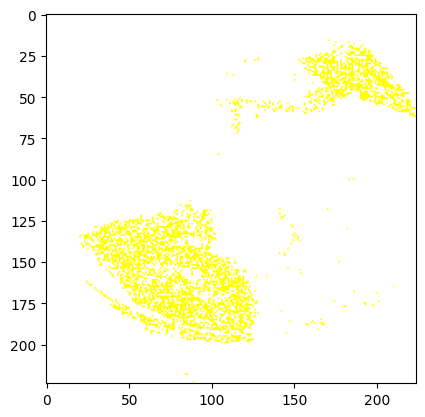

In [5]:
plt.imshow(X[20])

In [6]:
# Assuming X[8] contains integer data that needs to be scaled to the range [0, 255]
X = np.clip(X, 0, 255).astype(np.uint8)

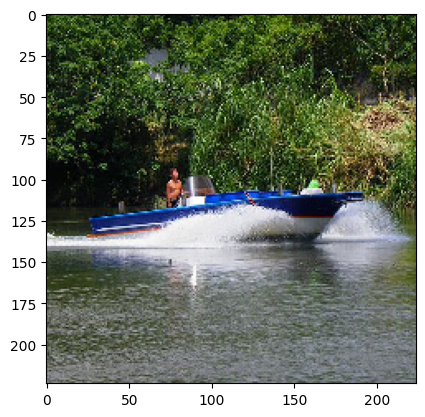

In [7]:
plt.imshow(X[2])

In [8]:
print(X.shape)

(50, 224, 224, 3)


In [9]:
# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

In [10]:
print("Number of ImageNet classes:", len(class_names))
print("Class names:", class_names)

Number of ImageNet classes: 1000
Class names: ['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead', 'electric_ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house_finch', 'junco', 'indigo_bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water_ouzel', 'kite', 'bald_eagle', 'vulture', 'great_grey_owl', 'European_fire_salamander', 'common_newt', 'eft', 'spotted_salamander', 'axolotl', 'bullfrog', 'tree_frog', 'tailed_frog', 'loggerhead', 'leatherback_turtle', 'mud_turtle', 'terrapin', 'box_turtle', 'banded_gecko', 'common_iguana', 'American_chameleon', 'whiptail', 'agama', 'frilled_lizard', 'alligator_lizard', 'Gila_monster', 'green_lizard', 'African_chameleon', 'Komodo_dragon', 'African_crocodile', 'American_alligator', 'triceratops', 'thunder_snake', 'ringneck_snake', 'hognose_snake', 'green_snake', 'king_snake', 'garter_snake', 'water_snake', 'vine_snake', 'night_snake', 'boa_constrictor', 'rock_python', 'Indian_cobra', 'green_mamba'

In [11]:
print(y[17])

14311.0


In [12]:
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# create an explainer with model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we explain two images using 100 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(
    X[1:3], max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)

  0%|          | 0/98 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [01:05, 32.60s/it]


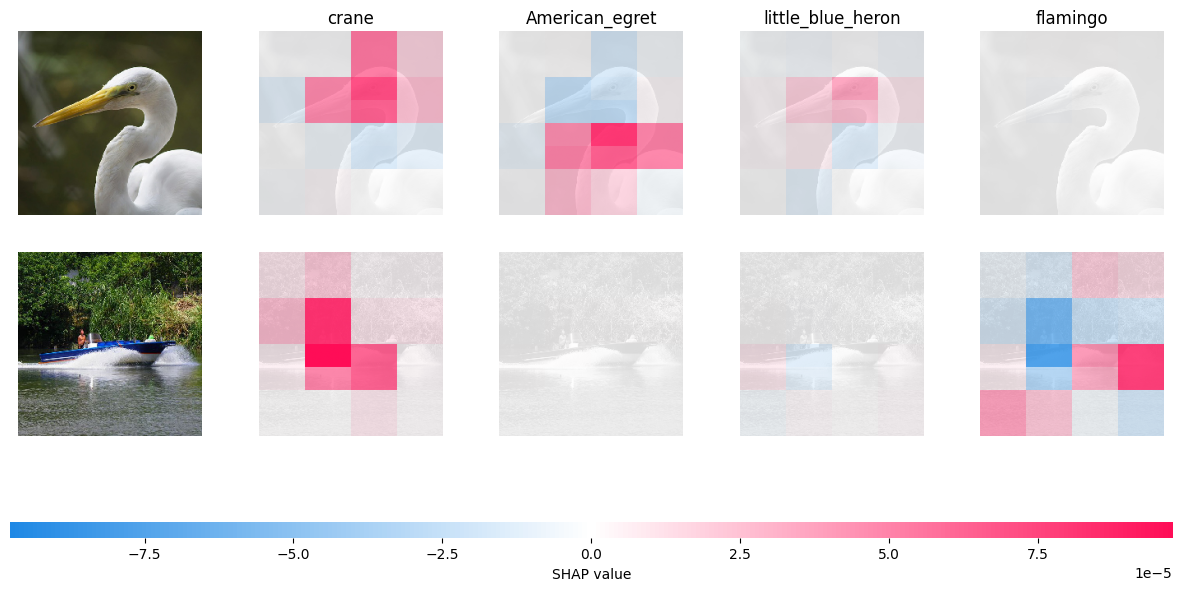

In [13]:
# output with shap values
shap.image_plot(shap_values)

In [14]:
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", X[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(f, masker_blur, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(
    X[1:3], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [03:28, 104.19s/it]


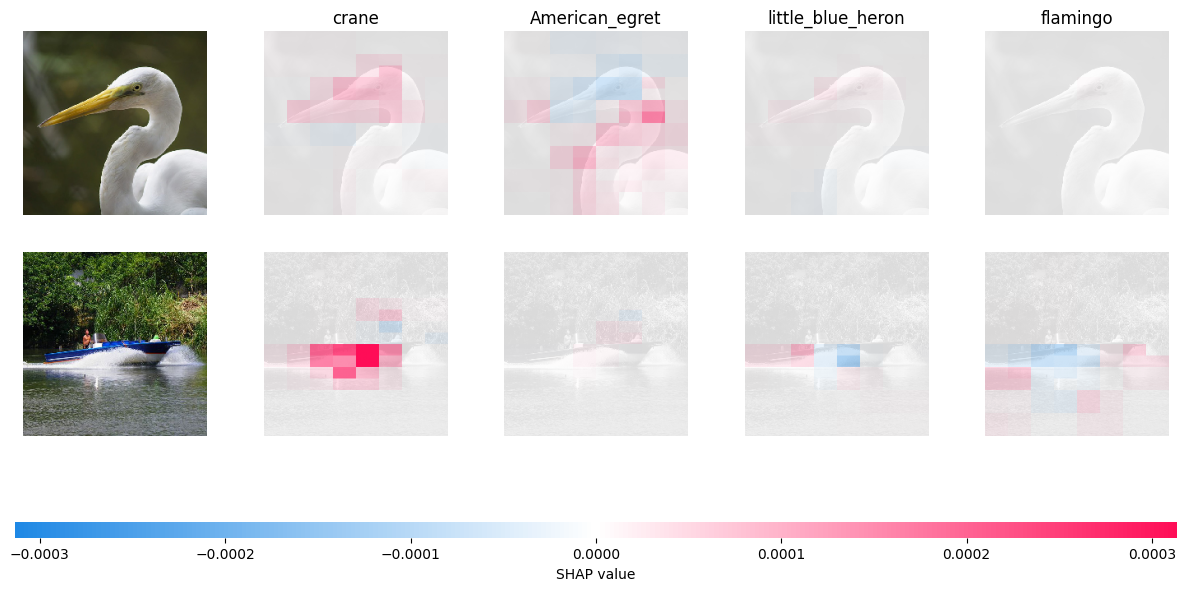

In [15]:
# output with shap values
shap.image_plot(shap_values_fine)